In [1]:
import pandas as pd

df = pd.read_csv("CompressionDecisionAgent/inferences/CompAgent_inference_task-Demo_TCGA-BRCA_prob.csv")
df

,fname,lambda_010,lambda_025,lambda_050,lambda_075,lambda_100,lambda_inf,lambda_000
0,Demo_TCGA-BRCA/HR/Demo_TCGA-BRCA_100672-103808...,0.496991,0.462015,0.502891,0.521913,0.596546,0,1
1,Demo_TCGA-BRCA/HR/Demo_TCGA-BRCA_100672-104832...,0.555514,0.541065,0.471095,0.501411,0.536338,0,1
2,Demo_TCGA-BRCA/HR/Demo_TCGA-BRCA_100672-105856...,0.578970,0.471764,0.523796,0.573018,0.537383,0,1
3,Demo_TCGA-BRCA/HR/Demo_TCGA-BRCA_100672-106880...,0.565668,0.524864,0.483721,0.596028,0.507380,0,1
4,Demo_TCGA-BRCA/HR/Demo_TCGA-BRCA_100672-107904...,0.538950,0.495260,0.527349,0.514774,0.553934,0,1
...,...,...,...,...,...,...,...,...
9273,Demo_TCGA-BRCA/HR/Demo_TCGA-BRCA_99648-158080.jpg,0.504852,0.490191,0.528643,0.594382,0.542449,0,1
9274,Demo_TCGA-BRCA/HR/Demo_TCGA-BRCA_99648-159104.jpg,0.562884,0.534688,0.502203,0.536847,0.527715,0,1
9275,Demo_TCGA-BRCA/HR/Demo_TCGA-BRCA_99648-160128.jpg,0.571904,0.524879,0.493559,0.489167,0.543686,0,1
9276,Demo_TCGA-BRCA/HR/Demo_TCGA-BRCA_99648-161152.jpg,0.537353,0.528883,0.538677,0.497888,0.584145,0,1


In [2]:
df.loc[:, "X"] = None
df.loc[:, "Y"] = None

df.X = df.fname.map(lambda x: int(x.split("/")[-1].split("_")[-1].split("-")[0]))
df.Y = df.fname.map(lambda x: int(x.split("/")[-1].split("_")[-1].split("-")[1].split(".")[0]))

df

,fname,lambda_010,lambda_025,lambda_050,lambda_075,lambda_100,lambda_inf,lambda_000,X,Y
0,Demo_TCGA-BRCA/HR/Demo_TCGA-BRCA_100672-103808...,0.496991,0.462015,0.502891,0.521913,0.596546,0,1,100672,103808
1,Demo_TCGA-BRCA/HR/Demo_TCGA-BRCA_100672-104832...,0.555514,0.541065,0.471095,0.501411,0.536338,0,1,100672,104832
2,Demo_TCGA-BRCA/HR/Demo_TCGA-BRCA_100672-105856...,0.578970,0.471764,0.523796,0.573018,0.537383,0,1,100672,105856
3,Demo_TCGA-BRCA/HR/Demo_TCGA-BRCA_100672-106880...,0.565668,0.524864,0.483721,0.596028,0.507380,0,1,100672,106880
4,Demo_TCGA-BRCA/HR/Demo_TCGA-BRCA_100672-107904...,0.538950,0.495260,0.527349,0.514774,0.553934,0,1,100672,107904
...,...,...,...,...,...,...,...,...,...,...
9273,Demo_TCGA-BRCA/HR/Demo_TCGA-BRCA_99648-158080.jpg,0.504852,0.490191,0.528643,0.594382,0.542449,0,1,99648,158080
9274,Demo_TCGA-BRCA/HR/Demo_TCGA-BRCA_99648-159104.jpg,0.562884,0.534688,0.502203,0.536847,0.527715,0,1,99648,159104
9275,Demo_TCGA-BRCA/HR/Demo_TCGA-BRCA_99648-160128.jpg,0.571904,0.524879,0.493559,0.489167,0.543686,0,1,99648,160128
9276,Demo_TCGA-BRCA/HR/Demo_TCGA-BRCA_99648-161152.jpg,0.537353,0.528883,0.538677,0.497888,0.584145,0,1,99648,161152


In [3]:
import openslide

slide = openslide.OpenSlide("Demo_TCGA-BRCA/WSI/Demo_TCGA-BRCA.svs")
thumbnail = slide.get_thumbnail((1024, 1024))
thumbnail.save("thumbnail_TCGA-BRCA-01.png")

In [9]:
import numpy as np
from scipy.stats import percentileofscore

def score2percentile(score, ref):
    percentile = percentileofscore(ref, score)
    return percentile

temp = np.zeros((135, 250)).astype(np.uint8)

for i, row in df.iterrows():
    percentile = score2percentile(row["lambda_075"], df.lambda_075)
    temp[row.X // 1024, row.Y // 1024] = percentile

/tmp/ipykernel_9160/4125129069.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_reversed = matplotlib.cm.get_cmap('RdBu_r')


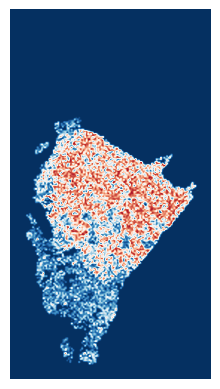

In [10]:
from PIL import Image
import matplotlib.pyplot as plt

temp = Image.fromarray(temp)
temp = temp.transpose(method=Image.Transpose.ROTATE_270).transpose(method=Image.Transpose.FLIP_LEFT_RIGHT)
temp = temp.resize((555, 1024))
temp.convert("RGBA")

# import seaborn as sns

# ax = sns.heatmap(temp, cmap="RdBu_r")
# cbar = ax.collections[0].colorbar
# cbar.set_ticks([])
# plt.axis('off')

import matplotlib
# cmap = matplotlib.cm.autumn
cmap_reversed = matplotlib.cm.get_cmap('RdBu_r')

plt.imshow(temp, cmap=cmap_reversed)
plt.axis('off')
plt.savefig("CDA_infer_heatmap_TCGA-BRCA_lambda_075.png", dpi=300)